### Consumer complaint classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv("Consumer_Complaints.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [4]:
df.shape

(9999, 18)

In [5]:
col = ['Product', 'Consumer Complaint']
df= df[col]

In [6]:
df= df[pd.notnull(df['Consumer Complaint'])]

In [7]:
df.columns=['Product', 'Consumer_complaint']

In [8]:
df['category_id'] = df['Product'].factorize()[0]

In [9]:
cat_id_df = df[["Product", "category_id"]].drop_duplicates().sort_values('category_id')

In [10]:
cat_to_id = dict(cat_id_df.values)

In [11]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)

In [12]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [13]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Product'>

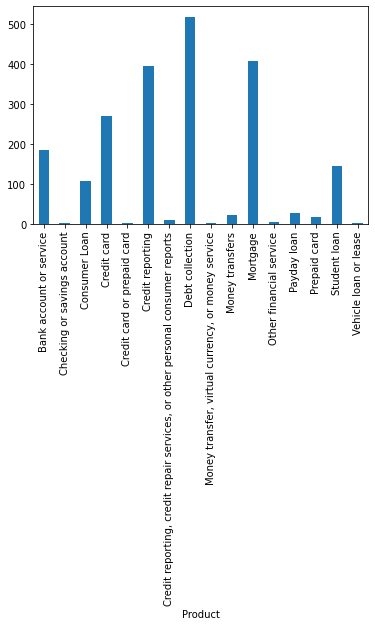

In [14]:
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [17]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

In [18]:
labels = df.category_id
features.shape

(2114, 6081)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['Product'], random_state= 0)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vect = CountVectorizer()

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

### Model Building

In [25]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [26]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit repor'])))

['Credit reporting']


In [27]:
y_pred = clf.predict(count_vect.transform(X_test))

In [28]:
from sklearn import metrics

In [29]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.80      0.69        44
                                                               Consumer Loan       0.36      0.43      0.39        21
                                                                 Credit card       0.69      0.78      0.73        72
                                                            Credit reporting       0.70      0.87      0.77        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.86      0.69      0.76       124
                                                             Money transfers       0.20      0.09      0.13        11
                                                       

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.pipeline import Pipeline

In [31]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LinearSVC())])

In [32]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LinearSVC())])

In [33]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [34]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7936908517350157


In [35]:
from sklearn.naive_bayes import BernoulliNB

In [36]:
mb=BernoulliNB()

In [37]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',BernoulliNB())])

In [38]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', BernoulliNB())])

In [39]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [40]:
y_pred=text_clf.predict(X_test)

In [41]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.71      0.55      0.62        44
                                                               Consumer Loan       0.50      0.14      0.22        21
                                                                 Credit card       0.69      0.60      0.64        72
                                                            Credit reporting       0.60      0.92      0.73        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.63      0.84      0.72       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.6580441640378549


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',DecisionTreeClassifier())])

In [45]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', DecisionTreeClassifier())])

In [46]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Debt collection'

In [47]:
y_pred=text_clf.predict(X_test)

In [48]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.32      0.55      0.41        44
                                                               Consumer Loan       0.25      0.29      0.27        21
                                                                 Credit card       0.68      0.64      0.66        72
                                                 Credit card or prepaid card       0.00      0.00      0.00         0
                                                            Credit reporting       0.64      0.74      0.69        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.70      0.60      0.64       124
                                                       

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\

In [49]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.6138801261829653


In [50]:
!pip install catboost

In [51]:
from catboost import CatBoostClassifier

In [52]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',CatBoostClassifier())])

In [53]:
text_clf.fit(X_train, y_train)

Learning rate set to 0.081007
0:	learn: 2.4854640	total: 1.36s	remaining: 22m 36s
1:	learn: 2.2831591	total: 2.57s	remaining: 21m 23s
2:	learn: 2.1564614	total: 3.77s	remaining: 20m 54s
3:	learn: 2.0605129	total: 5.08s	remaining: 21m 5s
4:	learn: 1.9462300	total: 6.29s	remaining: 20m 51s
5:	learn: 1.8610484	total: 7.53s	remaining: 20m 47s
6:	learn: 1.7890315	total: 8.75s	remaining: 20m 41s
7:	learn: 1.7248507	total: 9.98s	remaining: 20m 37s
8:	learn: 1.6704831	total: 11.2s	remaining: 20m 31s
9:	learn: 1.6290230	total: 12.4s	remaining: 20m 26s
10:	learn: 1.5851092	total: 13.6s	remaining: 20m 23s
11:	learn: 1.5387648	total: 14.9s	remaining: 20m 23s
12:	learn: 1.5082813	total: 16.1s	remaining: 20m 20s
13:	learn: 1.4703662	total: 17.3s	remaining: 20m 17s
14:	learn: 1.4445402	total: 18.5s	remaining: 20m 14s
15:	learn: 1.4213383	total: 19.7s	remaining: 20m 12s
16:	learn: 1.3953513	total: 20.9s	remaining: 20m 10s
17:	learn: 1.3735164	total: 22.2s	remaining: 20m 8s
18:	learn: 1.3509443	total: 

153:	learn: 0.7530293	total: 3m 20s	remaining: 18m 23s
154:	learn: 0.7525985	total: 3m 22s	remaining: 18m 22s
155:	learn: 0.7510070	total: 3m 23s	remaining: 18m 20s
156:	learn: 0.7498981	total: 3m 24s	remaining: 18m 19s
157:	learn: 0.7489539	total: 3m 26s	remaining: 18m 17s
158:	learn: 0.7481149	total: 3m 27s	remaining: 18m 16s
159:	learn: 0.7451465	total: 3m 28s	remaining: 18m 15s
160:	learn: 0.7444409	total: 3m 29s	remaining: 18m 13s
161:	learn: 0.7428568	total: 3m 31s	remaining: 18m 11s
162:	learn: 0.7417085	total: 3m 32s	remaining: 18m 10s
163:	learn: 0.7412448	total: 3m 33s	remaining: 18m 9s
164:	learn: 0.7378078	total: 3m 34s	remaining: 18m 7s
165:	learn: 0.7374767	total: 3m 36s	remaining: 18m 5s
166:	learn: 0.7369168	total: 3m 37s	remaining: 18m 4s
167:	learn: 0.7361064	total: 3m 38s	remaining: 18m 2s
168:	learn: 0.7351648	total: 3m 39s	remaining: 18m 1s
169:	learn: 0.7334652	total: 3m 41s	remaining: 17m 59s
170:	learn: 0.7331014	total: 3m 42s	remaining: 17m 58s
171:	learn: 0.73

303:	learn: 0.6268656	total: 6m 45s	remaining: 15m 27s
304:	learn: 0.6256321	total: 6m 46s	remaining: 15m 27s
305:	learn: 0.6233371	total: 6m 48s	remaining: 15m 26s
306:	learn: 0.6230659	total: 6m 50s	remaining: 15m 25s
307:	learn: 0.6228915	total: 6m 51s	remaining: 15m 24s
308:	learn: 0.6224458	total: 6m 53s	remaining: 15m 24s
309:	learn: 0.6217015	total: 6m 54s	remaining: 15m 23s
310:	learn: 0.6214223	total: 6m 56s	remaining: 15m 22s
311:	learn: 0.6212131	total: 6m 58s	remaining: 15m 22s
312:	learn: 0.6209477	total: 7m	remaining: 15m 22s
313:	learn: 0.6206643	total: 7m 1s	remaining: 15m 21s
314:	learn: 0.6204832	total: 7m 3s	remaining: 15m 21s
315:	learn: 0.6201228	total: 7m 5s	remaining: 15m 20s
316:	learn: 0.6198125	total: 7m 6s	remaining: 15m 19s
317:	learn: 0.6191932	total: 7m 8s	remaining: 15m 19s
318:	learn: 0.6185327	total: 7m 10s	remaining: 15m 18s
319:	learn: 0.6182441	total: 7m 11s	remaining: 15m 17s
320:	learn: 0.6170650	total: 7m 13s	remaining: 15m 17s
321:	learn: 0.61676

453:	learn: 0.5561557	total: 10m 32s	remaining: 12m 41s
454:	learn: 0.5559439	total: 10m 34s	remaining: 12m 39s
455:	learn: 0.5557093	total: 10m 35s	remaining: 12m 38s
456:	learn: 0.5547732	total: 10m 36s	remaining: 12m 36s
457:	learn: 0.5545509	total: 10m 38s	remaining: 12m 35s
458:	learn: 0.5541835	total: 10m 40s	remaining: 12m 34s
459:	learn: 0.5537098	total: 10m 41s	remaining: 12m 33s
460:	learn: 0.5534206	total: 10m 42s	remaining: 12m 31s
461:	learn: 0.5528003	total: 10m 44s	remaining: 12m 30s
462:	learn: 0.5524293	total: 10m 45s	remaining: 12m 28s
463:	learn: 0.5521044	total: 10m 47s	remaining: 12m 27s
464:	learn: 0.5518667	total: 10m 48s	remaining: 12m 26s
465:	learn: 0.5517001	total: 10m 50s	remaining: 12m 25s
466:	learn: 0.5513648	total: 10m 52s	remaining: 12m 24s
467:	learn: 0.5511759	total: 10m 53s	remaining: 12m 22s
468:	learn: 0.5509242	total: 10m 54s	remaining: 12m 21s
469:	learn: 0.5505749	total: 10m 56s	remaining: 12m 20s
470:	learn: 0.5497040	total: 10m 58s	remaining: 

601:	learn: 0.4984057	total: 14m 22s	remaining: 9m 30s
602:	learn: 0.4982313	total: 14m 24s	remaining: 9m 29s
603:	learn: 0.4980112	total: 14m 25s	remaining: 9m 27s
604:	learn: 0.4978297	total: 14m 27s	remaining: 9m 26s
605:	learn: 0.4974404	total: 14m 28s	remaining: 9m 24s
606:	learn: 0.4972372	total: 14m 30s	remaining: 9m 23s
607:	learn: 0.4971080	total: 14m 31s	remaining: 9m 21s
608:	learn: 0.4969804	total: 14m 32s	remaining: 9m 20s
609:	learn: 0.4968010	total: 14m 34s	remaining: 9m 19s
610:	learn: 0.4964188	total: 14m 35s	remaining: 9m 17s
611:	learn: 0.4961981	total: 14m 37s	remaining: 9m 16s
612:	learn: 0.4960489	total: 14m 38s	remaining: 9m 14s
613:	learn: 0.4958665	total: 14m 40s	remaining: 9m 13s
614:	learn: 0.4956672	total: 14m 41s	remaining: 9m 11s
615:	learn: 0.4954899	total: 14m 43s	remaining: 9m 10s
616:	learn: 0.4950648	total: 14m 44s	remaining: 9m 9s
617:	learn: 0.4947904	total: 14m 46s	remaining: 9m 7s
618:	learn: 0.4946235	total: 14m 47s	remaining: 9m 6s
619:	learn: 0

752:	learn: 0.4566214	total: 18m 22s	remaining: 6m 1s
753:	learn: 0.4561978	total: 18m 24s	remaining: 6m
754:	learn: 0.4560201	total: 18m 27s	remaining: 5m 59s
755:	learn: 0.4557414	total: 18m 29s	remaining: 5m 57s
756:	learn: 0.4555886	total: 18m 31s	remaining: 5m 56s
757:	learn: 0.4553663	total: 18m 33s	remaining: 5m 55s
758:	learn: 0.4551554	total: 18m 34s	remaining: 5m 54s
759:	learn: 0.4548971	total: 18m 36s	remaining: 5m 52s
760:	learn: 0.4547116	total: 18m 37s	remaining: 5m 51s
761:	learn: 0.4544932	total: 18m 39s	remaining: 5m 49s
762:	learn: 0.4543202	total: 18m 40s	remaining: 5m 48s
763:	learn: 0.4541368	total: 18m 42s	remaining: 5m 46s
764:	learn: 0.4539871	total: 18m 43s	remaining: 5m 45s
765:	learn: 0.4537432	total: 18m 44s	remaining: 5m 43s
766:	learn: 0.4532576	total: 18m 46s	remaining: 5m 42s
767:	learn: 0.4530670	total: 18m 48s	remaining: 5m 40s
768:	learn: 0.4529139	total: 18m 49s	remaining: 5m 39s
769:	learn: 0.4526875	total: 18m 51s	remaining: 5m 37s
770:	learn: 0.4

902:	learn: 0.4211260	total: 22m 6s	remaining: 2m 22s
903:	learn: 0.4208897	total: 22m 8s	remaining: 2m 21s
904:	learn: 0.4206786	total: 22m 9s	remaining: 2m 19s
905:	learn: 0.4202140	total: 22m 11s	remaining: 2m 18s
906:	learn: 0.4200609	total: 22m 12s	remaining: 2m 16s
907:	learn: 0.4198753	total: 22m 14s	remaining: 2m 15s
908:	learn: 0.4197449	total: 22m 15s	remaining: 2m 13s
909:	learn: 0.4192184	total: 22m 16s	remaining: 2m 12s
910:	learn: 0.4190614	total: 22m 18s	remaining: 2m 10s
911:	learn: 0.4187792	total: 22m 20s	remaining: 2m 9s
912:	learn: 0.4185335	total: 22m 21s	remaining: 2m 7s
913:	learn: 0.4184016	total: 22m 23s	remaining: 2m 6s
914:	learn: 0.4182756	total: 22m 25s	remaining: 2m 4s
915:	learn: 0.4180049	total: 22m 26s	remaining: 2m 3s
916:	learn: 0.4178841	total: 22m 28s	remaining: 2m 2s
917:	learn: 0.4177464	total: 22m 30s	remaining: 2m
918:	learn: 0.4175818	total: 22m 31s	remaining: 1m 59s
919:	learn: 0.4174844	total: 22m 33s	remaining: 1m 57s
920:	learn: 0.4173000	t

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x0000022BB9899850>)])

In [54]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

array(['Credit reporting'], dtype=object)

In [55]:
y_pred=text_clf.predict(X_test)

In [56]:
y_pred

array([['Credit card'],
       ['Credit card'],
       ['Debt collection'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit reporting'],
       ['Student loan'],
       ['Credit card'],
       ['Debt collection'],
       ['Bank account or service'],
       ['Mortgage'],
       ['Bank account or service'],
       ['Mortgage'],
       ['Debt collection'],
       ['Debt collection'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit reporting'],
       ['Debt collection'],
       ['Credit reporting'],
       ['Credit reporting'],
       ['Debt collection'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Credit card'],
       ['Credit reporting'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Bank account or service'],
       ['Credit card'],
       ['Bank account or service'],
       ['Credit card'],

In [57]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.65      0.75      0.69        44
                                                               Consumer Loan       0.79      0.52      0.63        21
                                                                 Credit card       0.75      0.78      0.76        72
                                                            Credit reporting       0.79      0.85      0.81        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.72      0.82      0.77       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))

C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',RandomForestClassifier())])

In [ ]:
text_clf.fit(X_train, y_train)

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

In [ ]:
print(np.mean(cv_results))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',XGBClassifier())])

In [ ]:
text_clf.fit(X_train, y_train)

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

In [ ]:
print(np.mean(cv_results))

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
text_clf=Pipeline([('tf',TfidfVectorizer(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english') ),
                 ('clf',LGBMClassifier())])

In [ ]:
text_clf.fit(X_train, y_train)

In [ ]:
y_pred=text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
cv_results = cross_val_score(text_clf, 
                                 X_train, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)

In [ ]:
print(np.mean(cv_results))

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
#Randomized Search CV
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5,n_jobs=-1)

In [ ]:
rf.fit(X_train_tfidf, y_train)

In [ ]:
rf.best_params_

In [ ]:
rf.best_score_

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
xgb=XGBClassifier()

In [ ]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [ ]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, n_jobs = -1)

In [ ]:
xgb.fit(X_train_tfidf, y_train)

In [ ]:
xgb.best_params_

In [ ]:
xgb.best_score_

### Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf', rf), ('mb', mb),('ab',XGBClassifier())]

clf = StackingClassifier(estimators=estimators)

In [ ]:
clf.fit(X_train_tfidf, y_train)

In [ ]:
cv_results = cross_val_score(clf, 
                                 X_train_tfidf, y_train, 
                                 cv=5,
                                 scoring="accuracy",
                                 n_jobs=-1)
print(np.mean(cv_results))